# Forecast Download

In [25]:
import os
import inspect
import time
import math
import json
import logging
import pickle
#import EWX_forecast as ewx

from energyworx_client.client import EWX
from energyworx_client import storage

import pandas as pd
import numpy as np
from scipy import stats
import pprint
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from IPython.display import display

base = os.getcwd()
namespace = 'na.engie.com'
api = EWX(namespace)
pp = pprint.PrettyPrinter(indent = 1)

## Get Meters in PR

## Batch Through PR / Meter for Adjusts

In [2]:
def meter_list(PR):
    acct_query = "".join(["SELECT datasource_id FROM tags, UNNEST (properties) props WHERE props.key = 'prnumber' AND props.value = '", str(PR), "'"])
    pr_accts = api.execute_query(acct_query, limit = 1000, raw_result = True)
    return(pr_accts)

In [4]:
PR_errors = storage.read_csv('PR_ewx_error.csv')
bad_pr = list(PR_errors.PR)
sub = bad_pr[5:]
sub

['1-J3G3P1',
 '1-J5RD3T',
 '1-HE0QHI',
 '1-J5FBCO',
 '1-J6JG39',
 '1-EOWVJU',
 '1-J6QQLH',
 '1-J625W5',
 '1-J6CLFX',
 '1-J6UK1Y',
 '1-J620OJ',
 '1-J5KT23',
 '1-J6BC0Q',
 '1-J6Q711',
 '1-IZXLEC',
 '1-IVGQQS',
 '1-J6PIW1',
 '1-J6REEI']

--------------------
starting PR 1-J3G3P1
timeout error? PR 1-J3G3P1
--------------------
starting PR 1-J5RD3T
found 5 meters.


/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


        v  h   m
h               
0  336.26  0  90
1  471.71  4  90
2  474.67  8  90
                    t       v
0 2019-01-01 00:00:00  336.26
1 2019-01-01 01:00:00  471.71
2 2019-01-01 02:00:00  474.67
wrote NEPOOL_BHE_10563061_CH3_ADJ.csv successfully.
error, meter NEPOOL_BHE_10029528.
error, meter NEPOOL_BHE_10029530.
error, meter NEPOOL_BHE_10004114.
Empty DataFrame
Columns: [v, h, m]
Index: []
Empty DataFrame
Columns: [t, v]
Index: []
wrote NEPOOL_BHE_10004115_CH3_ADJ.csv successfully.
error, meter NEPOOL_BHE_10004115.
finished PR, 1-J5RD3T.
--------------------
starting PR 1-HE0QHI
found 58 meters.
error, meter NEPOOL_BECO_27830520014.
error, meter NEPOOL_BECO_28363330045.
error, meter NEPOOL_BECO_26324331029.
        v  h  m
h              
0  15.132  0  0
1  19.902  1  0
2  20.748  2  0
3  21.828  3  0
4  21.192  4  0
                     t       v
0  2019-01-01 00:00:00  15.132
1  2019-01-01 01:00:00  19.902
2  2019-01-01 02:00:00  20.748
3  2019-01-01 03:00:00  21.828
4  20

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


error, meter NEPOOL_MECO_2822598007.
error, meter NEPOOL_MECO_5056113006.
error, meter NEPOOL_MECO_2781549006.
error, meter NEPOOL_MECO_1289436014.
error, meter NEPOOL_MECO_1307238009.
error, meter NEPOOL_MECO_4713848003.
error, meter NEPOOL_MECO_6542850006.
error, meter NEPOOL_MECO_9012969004.
error, meter NEPOOL_BECO_27970480045.
error, meter NEPOOL_BECO_26324321004.
error, meter NEPOOL_BECO_27830520014.
error, meter NEPOOL_BECO_26324331029.
error, meter NEPOOL_MECO_9428588004.
error, meter NEPOOL_COMELEC_14268290047.
error, meter NEPOOL_BECO_28363330045.
error, meter NEPOOL_WMECO_54730926029_905833007.
error, meter NEPOOL_MECO_6467768007.
error, meter NEPOOL_WMECO_54914391073_379831004.
error, meter NEPOOL_WMECO_54360195069_037623006.
error, meter NEPOOL_COMELEC_28915030010.
error, meter NEPOOL_COMELEC_13319610021.
error, meter NEPOOL_COMELEC_28189510028.
           v  h  m
h                 
0  19.997999  0  0
1  19.781999  1  0
2  19.925999  2  0
3  19.835999  3  0
4  20.051999  4

error, meter NEPOOL_CMP_035011357049.
error, meter NEPOOL_CMP_035011340367.
error, meter NEPOOL_CMP_035014917328.
error, meter NEPOOL_CMP_035010689525.
error, meter NEPOOL_CMP_035014771832.
error, meter NEPOOL_CMP_035011265432.
error, meter NEPOOL_CMP_035013234188.
error, meter NEPOOL_CMP_035015596147.
error, meter NEPOOL_CMP_035012269789.
error, meter NEPOOL_CMP_035012030280.
error, meter NEPOOL_CMP_035010602700.
error, meter NEPOOL_CMP_035010191142.
error, meter NEPOOL_CMP_035016400471.
error, meter NEPOOL_CMP_035011981939.
error, meter NEPOOL_CMP_035015410356.
error, meter NEPOOL_CMP_035013234311.
error, meter NEPOOL_CMP_035015553916.
error, meter NEPOOL_CMP_035016180446.
error, meter NEPOOL_CMP_035015596147.
error, meter NEPOOL_CMP_035016183630.
error, meter NEPOOL_CMP_035012250870.
error, meter NEPOOL_CMP_035016799765.
error, meter NEPOOL_CMP_035016289718.
error, meter NEPOOL_CMP_035012103962.
error, meter NEPOOL_CMP_030011300552.
error, meter NEPOOL_CMP_030011300578.
error, meter

error, meter NEPOOL_COMELEC_14167400010.
error, meter NEPOOL_COMELEC_13640080019.
error, meter NEPOOL_COMELEC_13758250016.
error, meter NEPOOL_COMELEC_15966810010.
error, meter NEPOOL_COMELEC_28207970022.
error, meter NEPOOL_COMELEC_15843750017.
error, meter NEPOOL_COMELEC_13376120013.
error, meter NEPOOL_COMELEC_27368980028.
error, meter NEPOOL_COMELEC_26823210021.
error, meter NEPOOL_COMELEC_14411100010.
error, meter NEPOOL_COMELEC_14843590010.
error, meter NEPOOL_COMELEC_14207520017.
error, meter NEPOOL_COMELEC_14410890017.
error, meter NEPOOL_COMELEC_14881120019.
error, meter NEPOOL_COMELEC_14639350017.
error, meter NEPOOL_COMELEC_14207440018.
error, meter NEPOOL_COMELEC_14880730016.
error, meter NEPOOL_COMELEC_13955040012.
error, meter NEPOOL_COMELEC_14639550012.
error, meter NEPOOL_COMELEC_14167780015.
error, meter NEPOOL_COMELEC_14880650016.
error, meter NEPOOL_COMELEC_27241010027.
error, meter NEPOOL_COMELEC_26900070025.
error, meter NEPOOL_COMELEC_15808620015.
error, meter NEP

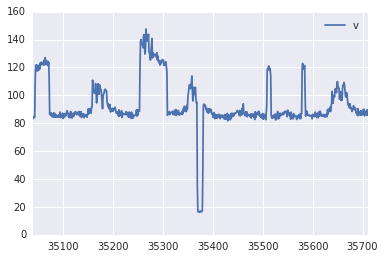

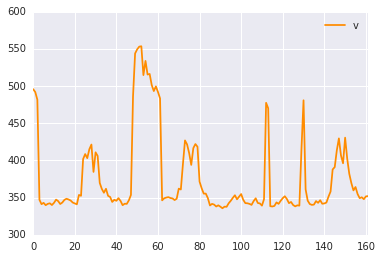

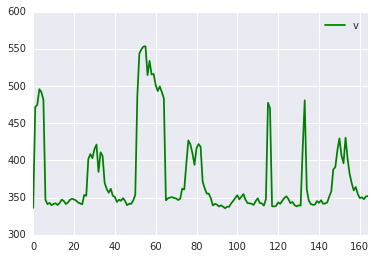

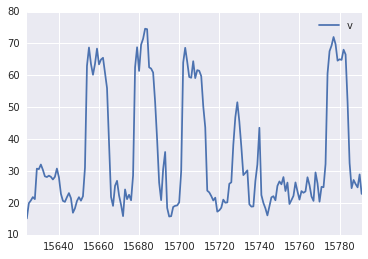

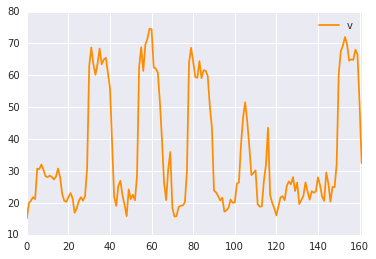

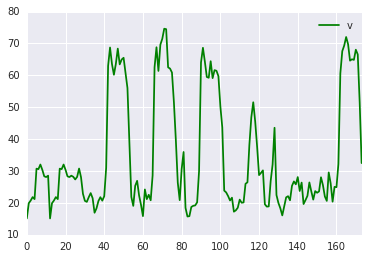

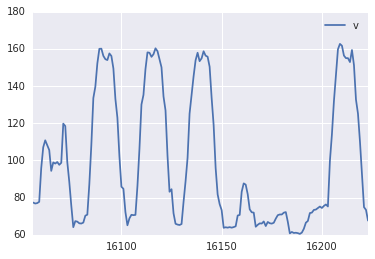

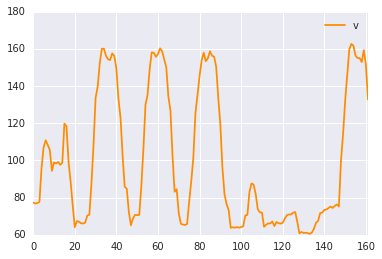

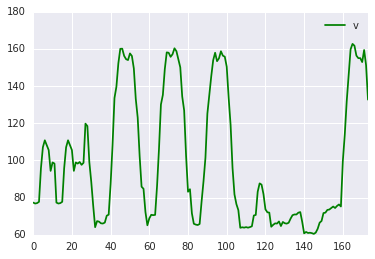

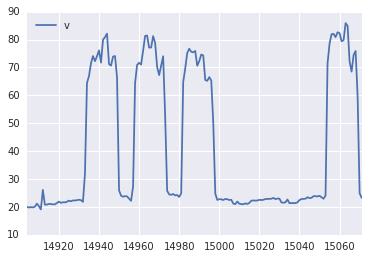

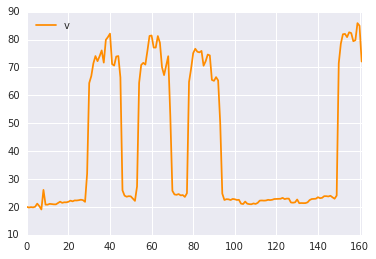

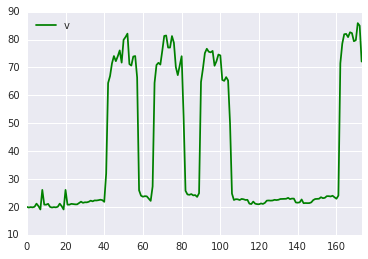

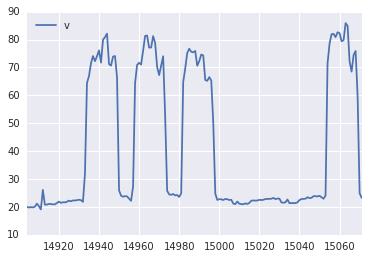

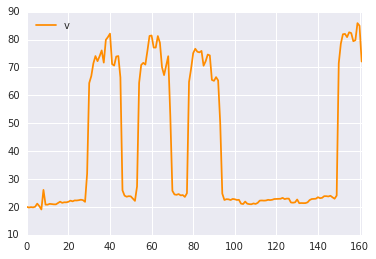

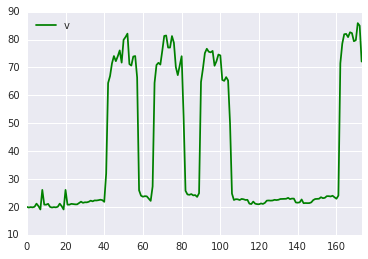

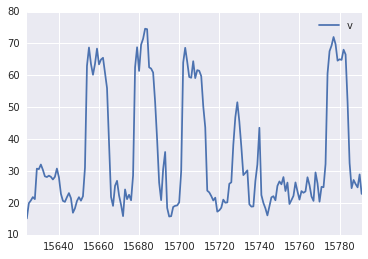

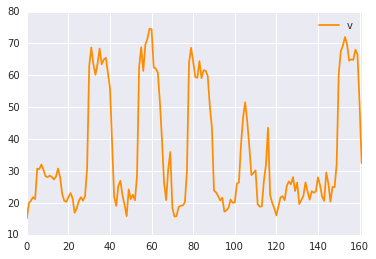

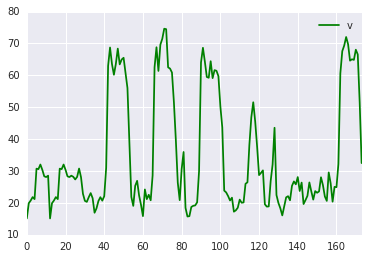

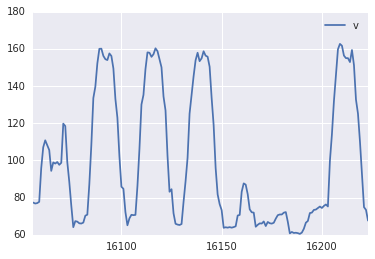

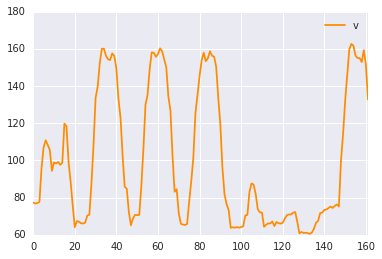

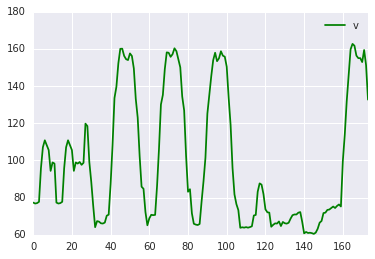

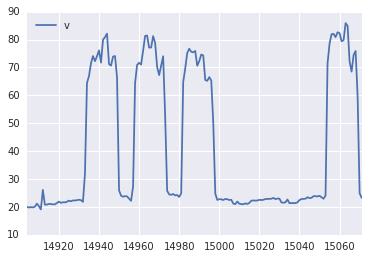

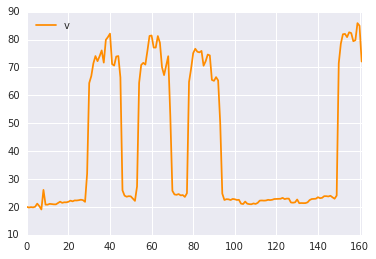

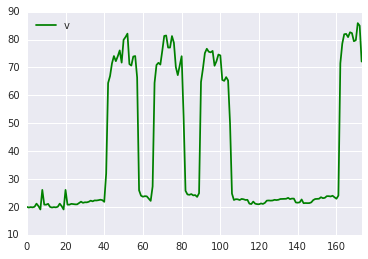

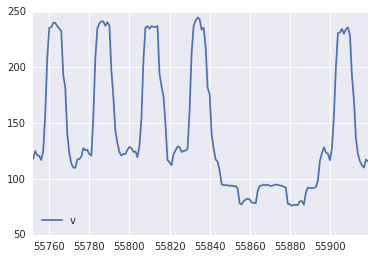

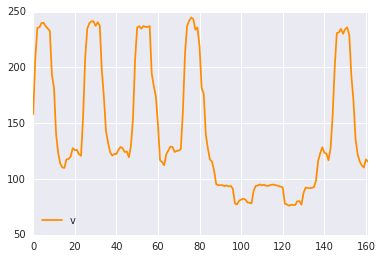

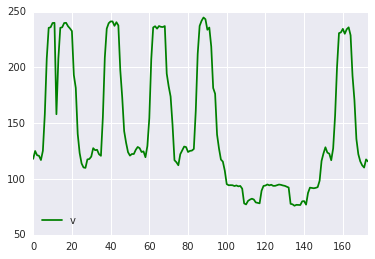

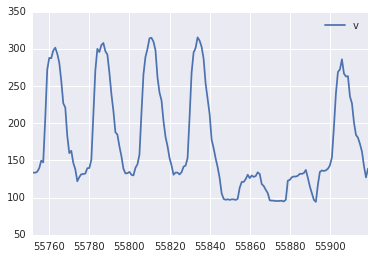

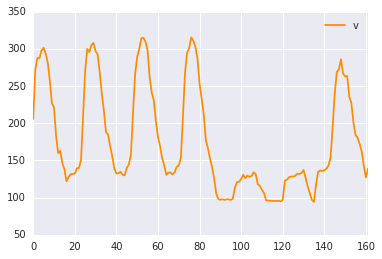

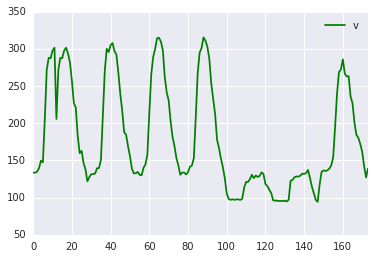

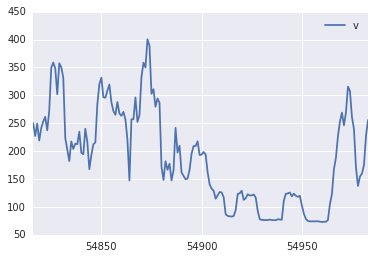

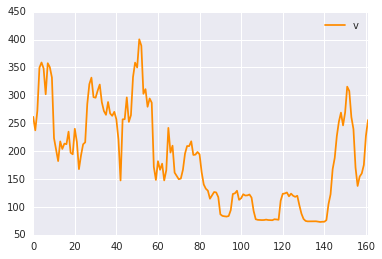

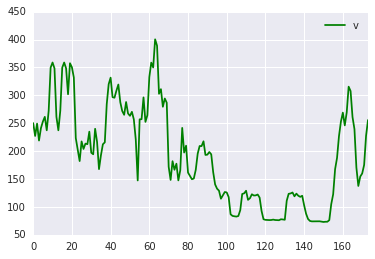

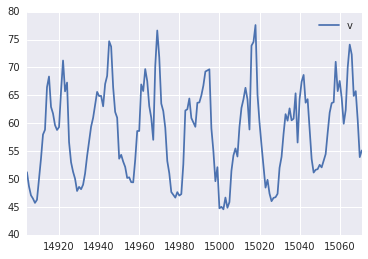

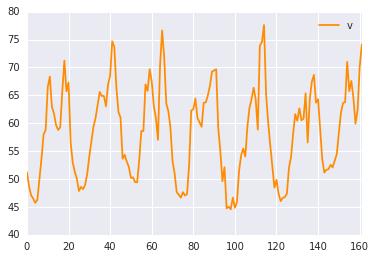

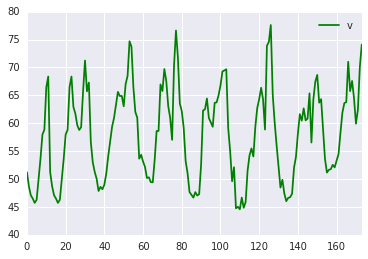

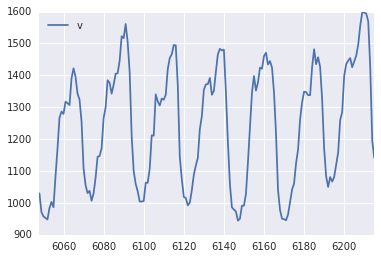

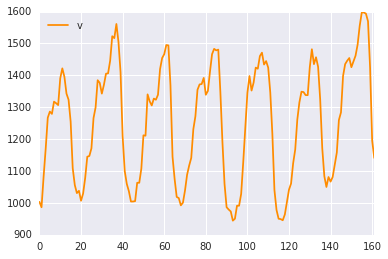

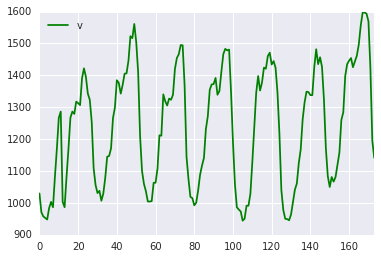

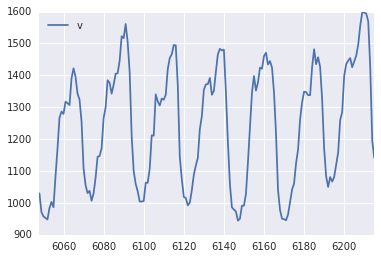

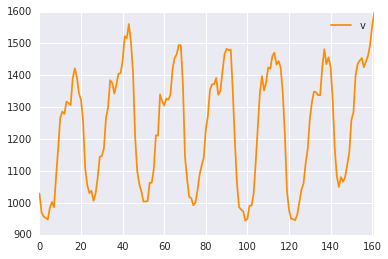

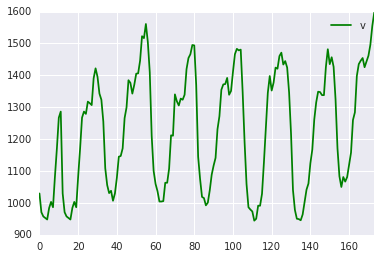

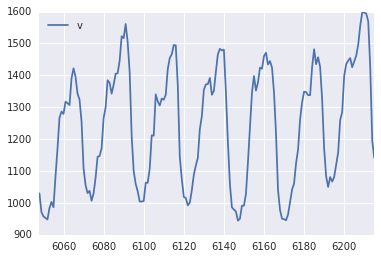

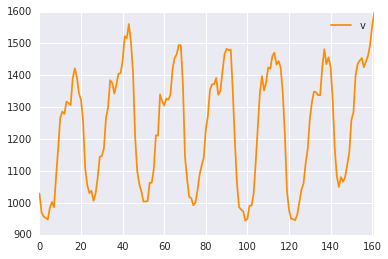

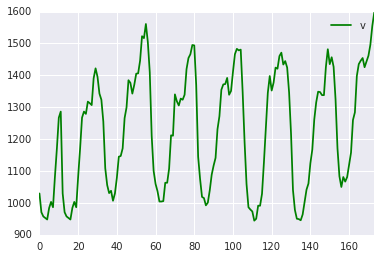

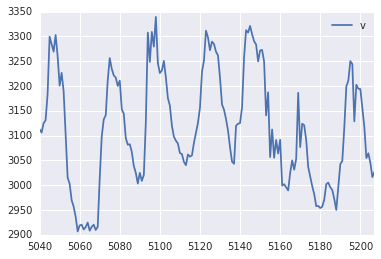

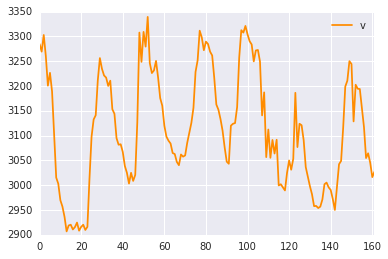

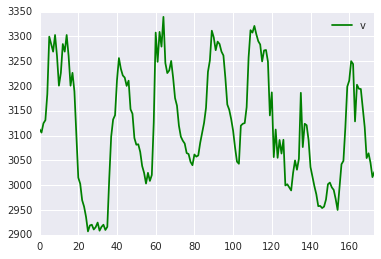

In [13]:
pr_err = []

for pr in sub:
    print '--------------------'
    print 'starting PR {}'.format(pr)
    try:
        batch_PR(pr)
        print 'finished PR, {}.'.format(pr)
        
    except:
        print 'timeout error? PR {}'.format(pr)
        pr_err.append(pr)

In [ ]:
storage.to_csv(pd.DataFrame(pr_err), 'PR_timeout_error.csv')

## Loop Through Forecast Adjust

In [5]:
def batch_PR(PR):

    error = []
    pr_output = meter_list(PR)
    pr_meters = []
    pr_rows = pr_output['rows']
    for r in pr_rows:
        m = str(r['f'][0]['v'])
        pr_meters.append(m)

    print 'found {} meters.'.format(len(pr_meters))
    for m in pr_meters:
        try:
            main(m)
        
        except:
            print 'error, meter {}.'.format(m)
            error.append(m)
            
    errors = pd.DataFrame(error)
    errors.columns = ['meters']
    fname = ''.join([PR, '_SCA_meters.csv'])
    storage.to_csv(errors, fname)

In [6]:
def main(meter):
    file_df, ingest, response = meter_search(meter)
    
    ch3 = download_response(response.blobKey[0])
    idr = download_ingest(ingest.blobKey[0])

    #print 'response payload:'
    #print ch3.head()

    #print 'ingest payload:'
    #print idr.head()
    
    fixed = fix_ewx_bs(ch3, idr)
    fname = ''.join([meter, '_CH3_ADJ.csv'])
    storage.to_csv(fixed, fname)
    print('wrote {} successfully.'.format(fname))
    
    jan_response = [(a.year == 2019 and a.month == 1 and a.day < 8) for a in ch3.t]
    jan_ch3 = ch3[jan_response]

    jan_fix = [(a.year == 2019 and a.month == 1 and a.day < 8) for a in fixed.t]
    fixed_jan = fixed[jan_fix]

    jan_ingest = [(a.year == 2019 and a.month == 1 and a.day < 8) for a in idr.t]
    jan_idr = idr[jan_ingest]
    
    jan_idr.plot(y = 'v')
    jan_ch3.plot(y = 'v', color = 'darkorange')
    fixed_jan.plot(y = 'v', color = 'green')

# Single Meter

In [26]:
meter = 'NEPOOL_MECO_2629670017'

## Search for Meter Data

In [2]:
def meter_search(tag):
    file_result = api.search_files(tags = tag)['items']
    file_df = pd.DataFrame(file_result)
    
    ingest = file_df[file_df.readOnly == True]
    response = file_df[file_df.readOnly == False]
    
    ingest.reset_index(drop = True, inplace = True)
    response.reset_index(drop = True, inplace = True)
    
    return(file_df, ingest, response)

## Enter Meter (can iterate thru lists, etc)

In [9]:
meter = "NEPOOL_WMECO_54137597076_074773004"

## Run thru code

In [27]:
file_df, ingest, response = meter_search(meter)
file_df

,blobKey,createdDatetime,deleted,filename,filesize,lastUpdatedDatetime,marketAdapterId,prefix,readOnly,subdir,tags,uri,userId
0,AMIfv96MR0_MzGYK1qzILVJjL8crwCgnOmgqM85WLyLlG_...,2019-07-22T14:20:21.517498,False,20190722090700405000_NEPOOL_MECO_2629670017.json,4060416,2019-07-22T14:20:21.517511,NaN,,False,None,"[vee, predeal, response, 20190722090700405000_...",/files/get/AMIfv96MR0_MzGYK1qzILVJjL8crwCgnOmg...,104057310256080480429
1,AMIfv95ZtQFmUDwBj5wFrQCiVyaj7QlBhkcl1OG-FbAb81...,2019-07-22T14:07:06.522522,False,20190722090700405000_NEPOOL_MECO_2629670017.json,586544,2019-07-22T14:07:06.523417,4850532223287296,,True,UPLOAD,"[4850532223287296, pubsub_payload, ingestion, ...",/files/get/AMIfv95ZtQFmUDwBj5wFrQCiVyaj7QlBhkc...,NaN
2,AMIfv96yWjxqMTyzJWPCoAcdm5U_MQRYs_aVAqkI_1SHSc...,2019-07-19T21:28:27.497812,False,20190719153608146000_NEPOOL_MECO_2629670017.json,3705316,2019-07-19T21:28:27.497825,NaN,,False,None,"[vee, predeal, response, 20190719153608146000_...",/files/get/AMIfv96yWjxqMTyzJWPCoAcdm5U_MQRYs_a...,104057310256080480429
3,AMIfv95SHZGWRM1K4-fnG2vph7SxBvgwKJDsbvgNrvhaRx...,2019-07-19T20:36:13.868940,False,20190719153608146000_NEPOOL_MECO_2629670017.json,586211,2019-07-19T20:36:13.868956,4850532223287296,,True,UPLOAD,"[4850532223287296, pubsub_payload, ingestion, ...",/files/get/AMIfv95SHZGWRM1K4-fnG2vph7SxBvgwKJD...,NaN


## Ingestion Payloads

In [28]:
ingest

,blobKey,createdDatetime,deleted,filename,filesize,lastUpdatedDatetime,marketAdapterId,prefix,readOnly,subdir,tags,uri,userId
0,AMIfv95ZtQFmUDwBj5wFrQCiVyaj7QlBhkcl1OG-FbAb81...,2019-07-22T14:07:06.522522,False,20190722090700405000_NEPOOL_MECO_2629670017.json,586544,2019-07-22T14:07:06.523417,4850532223287296,,True,UPLOAD,"[4850532223287296, pubsub_payload, ingestion, ...",/files/get/AMIfv95ZtQFmUDwBj5wFrQCiVyaj7QlBhkc...,NaN
1,AMIfv95SHZGWRM1K4-fnG2vph7SxBvgwKJDsbvgNrvhaRx...,2019-07-19T20:36:13.868940,False,20190719153608146000_NEPOOL_MECO_2629670017.json,586211,2019-07-19T20:36:13.868956,4850532223287296,,True,UPLOAD,"[4850532223287296, pubsub_payload, ingestion, ...",/files/get/AMIfv95SHZGWRM1K4-fnG2vph7SxBvgwKJD...,NaN


## Response Payloads

In [29]:
response

,blobKey,createdDatetime,deleted,filename,filesize,lastUpdatedDatetime,marketAdapterId,prefix,readOnly,subdir,tags,uri,userId
0,AMIfv96MR0_MzGYK1qzILVJjL8crwCgnOmgqM85WLyLlG_...,2019-07-22T14:20:21.517498,False,20190722090700405000_NEPOOL_MECO_2629670017.json,4060416,2019-07-22T14:20:21.517511,NaN,,False,None,"[vee, predeal, response, 20190722090700405000_...",/files/get/AMIfv96MR0_MzGYK1qzILVJjL8crwCgnOmg...,104057310256080480429
1,AMIfv96yWjxqMTyzJWPCoAcdm5U_MQRYs_aVAqkI_1SHSc...,2019-07-19T21:28:27.497812,False,20190719153608146000_NEPOOL_MECO_2629670017.json,3705316,2019-07-19T21:28:27.497825,NaN,,False,None,"[vee, predeal, response, 20190719153608146000_...",/files/get/AMIfv96yWjxqMTyzJWPCoAcdm5U_MQRYs_a...,104057310256080480429


## Download Payloads

In [30]:
def download_response(blobkey):
    json_str = api.download_file(blob_key = blobkey)
    parse = json.loads(json_str)
    
    acct = parse['account']
    data = acct['timeseriesdataidr'][0]
    forecast = data['reads']
    
    ch3 = pd.DataFrame(forecast)
    ch3.columns = [str(c) for c in ch3.columns]
    ch3['t'] = pd.to_datetime(ch3['t'])
    ch3['v'] = pd.to_numeric(ch3['v'])
    
    return(ch3)

def download_ingest(blobkey):
    json_str = api.download_file(blob_key = blobkey)
    parse = json.loads(json_str)
    
    acct = parse['account']
    data = acct['timeseriesdataidr'][0]
    ingest = data['reads']
    
    idr = pd.DataFrame(ingest)
    idr.columns = [str(c) for c in idr.columns]
    idr['t'] = pd.to_datetime(idr['t'])
    idr['v'] = pd.to_numeric(idr['v'])
    
    return(idr)

## Actual Download

In [31]:
ch3 = download_response(response.blobKey[0])
idr = download_ingest(ingest.blobKey[0])

print 'response payload:'
print ch3.head()
print '...'
print ch3.tail()
print ''
print '------------------------------------'
print 'ingest payload:'
print idr.head()
print '...'
print idr.tail()

response payload:
                    t           v
0 2019-01-01 00:00:00  121.282233
1 2019-01-01 01:00:00  120.470981
2 2019-01-01 02:00:00  122.228694
3 2019-01-01 03:00:00  123.986408
4 2019-01-01 04:00:00  124.121617
...
                       t           v
8755 2019-12-31 19:00:00  129.259548
8756 2019-12-31 20:00:00  128.042670
8757 2019-12-31 21:00:00  127.637044
8758 2019-12-31 22:00:00  126.149748
8759 2019-12-31 23:00:00  126.014539

------------------------------------
ingest payload:
                    t           v
0 2018-01-08 00:00:00  128.145916
1 2018-01-08 01:00:00  125.897742
2 2018-01-08 02:00:00  126.294478
3 2018-01-08 03:00:00  129.203880
4 2018-01-08 04:00:00  128.674898
...
                        t       v
13302 2019-07-09 05:00:00  336.69
13303 2019-07-09 06:00:00  351.54
13304 2019-07-09 07:00:00  395.73
13305 2019-07-09 08:00:00  437.22
13306                 NaT     NaN


## Output to File

In [32]:
fname = ''.join([meter,'_idr.csv'])
fname_ch3 = ''.join([meter,'_ch3.csv'])

print 'outputting idr as {}...'.format(fname)
print ''
print 'outputting ch3 as {}...'.format(fname_ch3)
print ''

outputting idr as NEPOOL_MECO_2629670017_idr.csv...

outputting ch3 as NEPOOL_MECO_2629670017_ch3.csv...



In [33]:
write = os.path.join('data', fname)
write3 = os.path.join('data', fname_ch3)

print '...to directory {}'.format(write)
print '...to directory {}'.format(write3)

...to directory data/NEPOOL_MECO_2629670017_idr.csv
...to directory data/NEPOOL_MECO_2629670017_ch3.csv


## Actual output

In [34]:
storage.to_csv(idr, write)
storage.to_csv(ch3, write3)
print 'idr written in {}.'.format(write)
print 'ch3 written in {}.'.format(write3)

idr written in data/NEPOOL_MECO_2629670017_idr.csv.
ch3 written in data/NEPOOL_MECO_2629670017_ch3.csv.


# Plot Data

Plot idr and/or ch. 3 data for meters.

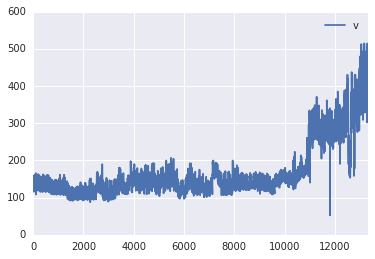

In [35]:
idr.plot(y = 'v')

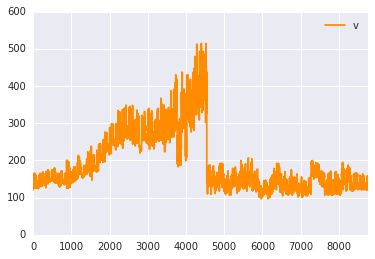

In [36]:
ch3.plot(y = 'v', color = 'darkorange')

## Fix Time Intervals

Implements a UTC-cleansing error fix. Times were not converted from UTC to local, not all accts affected.

## Measure Error

Comparing the first week of January, EWX response is compared to Engie payload. 
EWX response is shifted six hours forward and compared to Engie payload.

In [29]:
def fix_ewx_bs(ch3, idr):

    #get beginning of idr
    jan_ingest = [(a.year == 2019 and a.month == 1 and a.day < 8) for a in idr.t]
    jan_idr = idr[jan_ingest]
    
    #shift ch 3 up six hrs
    time_diff = dt.timedelta(hours = 6)
    new_ch3_time = [time + time_diff for time in ch3['t']]
    ch3['t'] = new_ch3_time
    
    #group jan idr into hourly data
    beg = jan_idr[:12]
    beg.reset_index(drop = True, inplace = True)
    beg['h'] = [time.hour for time in beg['t']]
    beg['m'] = [time.minute for time in beg['t']]

    hourly = beg.groupby(beg['h']).sum()
    print hourly.head()
    
    true_hr = beg[beg.m == 0]

    #make final jan idr hourly 
    real_val = hourly['v']
    real_time = true_hr['t']

    real_val.reset_index(drop = True, inplace = True)
    real_time.reset_index(drop = True, inplace = True)

    new_beg = pd.concat([real_time, real_val], axis = 1)
    print new_beg
    
    #add to bad forecast
    final = pd.concat([new_beg, ch3], axis = 0)
    final.reset_index(inplace = True, drop = True)
    
    curr_yr = [a.year == 2019 for a in final['t']]
    final = final[curr_yr]
    
    return(final)

In [30]:
fixed = fix_ewx_bs(ch3, idr)

         v  h  m
h               
0  238.665  0  0
1  237.150  1  0
2  243.660  2  0
3  246.720  3  0
4  259.440  4  0
                     t        v
0  2019-01-01 00:00:00  238.665
1  2019-01-01 01:00:00  237.150
2  2019-01-01 02:00:00  243.660
3  2019-01-01 03:00:00  246.720
4  2019-01-01 04:00:00  259.440
5  2019-01-01 05:00:00  260.205
6  2019-01-01 06:00:00  263.160
7  2019-01-01 07:00:00  262.425
8  2019-01-01 08:00:00  253.695
9  2019-01-01 09:00:00  257.160
10 2019-01-01 10:00:00  264.915
11 2019-01-01 11:00:00  252.720


/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
jan_response = [(a.year == 2019 and a.month == 1 and a.day < 8) for a in ch3.t]
jan_ch3 = ch3[jan_response]

jan_fix = [(a.year == 2019 and a.month == 1 and a.day < 8) for a in fixed.t]
fixed_jan = fixed[jan_fix]

jan_ingest = [(a.year == 2019 and a.month == 1 and a.day < 8) for a in idr.t]
jan_idr = idr[jan_ingest]

## IDR

## Bad Forecast

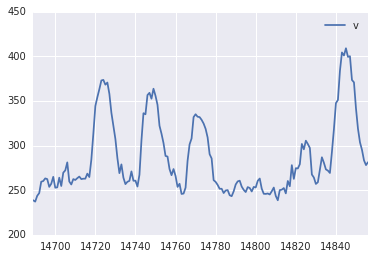

In [27]:
jan_idr.plot(y = 'v')

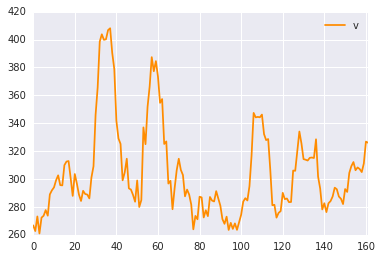

In [24]:
jan_ch3.plot(y = 'v', color = 'darkorange')

## Fixed Forecast

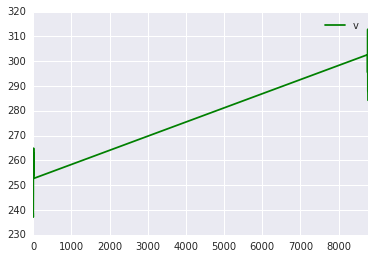

In [35]:
fixed_jan.plot(y = 'v', color = 'green')

## Export Fixed

In [ ]:
storage.to_csv(fixed, 'PJM_COMED_9438072022_ch3_adj.csv')

In [33]:
fixed_jan.head()

,t,v
0,2019-01-01 00:00:00,238.665
1,2019-01-01 01:00:00,237.150
2,2019-01-01 02:00:00,243.660
3,2019-01-01 03:00:00,246.720
4,2019-01-01 04:00:00,259.440


In [34]:
fixed_jan.tail()

,t,v
8767,2019-01-01 07:00:00,287.880
8768,2019-01-01 08:00:00,303.570
8769,2019-01-01 09:00:00,296.715
8770,2019-01-01 10:00:00,288.825
8771,2019-01-01 11:00:00,284.250
